In [8]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%timeit ,  line_profiler, memory_profiler
from IPython.display import display, HTML

In [2]:
def load(namefile):
    return pd.read_csv(namefile, index_col=False)
df = load('train.csv')

In [6]:
df.head()
df.tail()
df.shape

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


(26729, 10)

In [10]:
def get_div(alist, values):
    init = """
        <body>
        <style>
        .announce {
            color: #208ffb;
            font-weight: bold;
        }
        </style><div class="announce">NULLs in dataset:<br>---------------------<br>
        """
    inner = ""
    if type(alist)==list:
        for col, val in zip(alist, values):
            inner += col +": " + str(val) + "<br>"
    else:
        inner = alist
    closing = "</div></body>"
    html = init + inner + closing
    return html
        

def print_nulls(data):
    null_cols = data.isnull().sum()
    null_cols = null_cols[null_cols>0]
    drop_cols = list(null_cols[null_cols > 0].index)
    val_cols = [null_cols[col] for col in drop_cols]
    if len(drop_cols)==0:
        display(HTML(get_div('<br>This dataset has no nulls<br><br>','')))
    else:
        display(HTML(get_div(drop_cols,val_cols)))

print_nulls(df)

In [14]:
for col in df.columns:
    l = len(df[col].unique())
    if l < 100:
        print("len de "+col+": "+str(l))
        print(df[col].unique())
        
    else:
        print("len de "+col+": "+str(l))

len de AnimalID: 26729
len de Name: 6375
len de DateTime: 22918
len de OutcomeType: 5
['Return_to_owner' 'Euthanasia' 'Adoption' 'Transfer' 'Died']
len de OutcomeSubtype: 17
[nan 'Suffering' 'Foster' 'Partner' 'Offsite' 'SCRP' 'Aggressive'
 'Behavior' 'Rabies Risk' 'Medical' 'In Kennel' 'In Foster' 'Barn'
 'Court/Investigation' 'Enroute' 'At Vet' 'In Surgery']
len de AnimalType: 2
['Dog' 'Cat']
len de SexuponOutcome: 6
['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 nan]
len de AgeuponOutcome: 45
['1 year' '2 years' '3 weeks' '1 month' '5 months' '4 years' '3 months'
 '2 weeks' '2 months' '10 months' '6 months' '5 years' '7 years' '3 years'
 '4 months' '12 years' '9 years' '6 years' '1 weeks' '11 years' '4 weeks'
 '7 months' '8 years' '11 months' '4 days' '9 months' '8 months'
 '15 years' '10 years' '1 week' '0 years' '14 years' '3 days' '6 days'
 '5 days' '5 weeks' '2 days' '16 years' '1 day' '13 years' nan '17 years'
 '18 years' '19 years' '20 years']
len de

In [18]:
dog = df.loc[df['AnimalType']=='Dog']

In [21]:
dog['OutcomeType'].value_counts()/(len(dog['OutcomeType']))

Adoption           0.416608
Return_to_owner    0.274832
Transfer           0.251170
Euthanasia         0.054184
Died               0.003206
Name: OutcomeType, dtype: float64

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

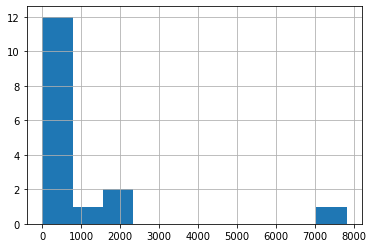

In [27]:
df['OutcomeSubtype'].value_counts()
df['OutcomeSubtype'].value_counts().hist()

In [ ]:
df['OutcomeSubtype'].value_counts()
df['OutcomeSubtype'].value_counts().hist()

In [48]:
 
def d2(string):
    res = 0
    if type(string)==str:
        t = string.split()
        mul = t[0]
        it = t[1]
        period = 0
        if 'year' in it:
            period = 365
        if 'month' in it:
            period = 30
        if 'week' in it:
            period = 7
        if 'day' in it:
            period = 1
        res = int(mul)*period
    
    return res
    

In [49]:
#df['days']=map(d2,df['AgeuponOutcome'])
df['days']=df['AgeuponOutcome'].apply(d2)
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,days
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730


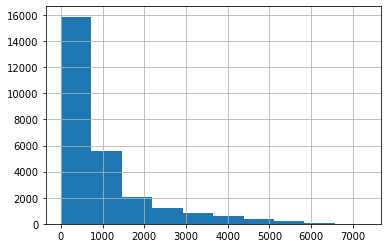

In [50]:
df['days'].hist()

In [51]:
adop = df.loc[df['OutcomeType']=='Adoption']
adop.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,days
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,150
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,365
11,A666320,NaN,2013-11-04 14:48:00,Adoption,NaN,Dog,Spayed Female,2 years,Miniature Schnauzer Mix,Silver,730
12,A684601,Rocket,2016-02-03 11:27:00,Adoption,Foster,Dog,Neutered Male,4 years,Pit Bull Mix,Brown,1460


In [52]:
df['DateTime']= pd.to_datetime(df['DateTime'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 11 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null datetime64[ns]
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
days              26729 non-null int64
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 2.2+ MB


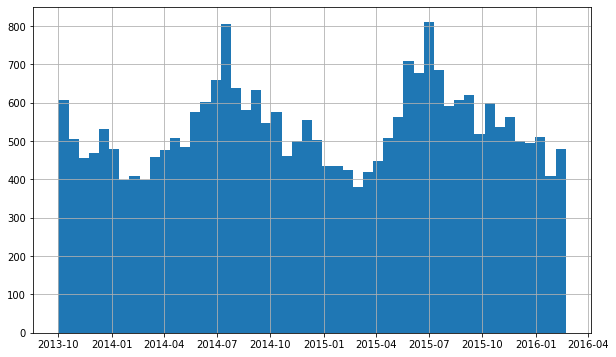

In [56]:
df['DateTime'].hist(bins=50, figsize=(10,6))

In [58]:
ow = df.loc[df['OutcomeType']=='Return_to_owner']
ow.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,days
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365
13,A704702,Scooter,2015-06-08 16:30:00,Return_to_owner,NaN,Dog,Neutered Male,2 years,Yorkshire Terrier Mix,Black/Red,730
14,A688584,Preston,2015-11-25 15:00:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Great Pyrenees Mix,White/Cream,365
19,A684787,Kuma,2014-07-30 17:34:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Flat Coat Retriever Mix,Black,365
24,A676333,Trigger,2014-04-09 17:44:00,Return_to_owner,NaN,Dog,Neutered Male,2 months,German Shepherd Mix,Black/Brown,60


In [59]:
ow['DateTime']= pd.to_datetime(ow['DateTime'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


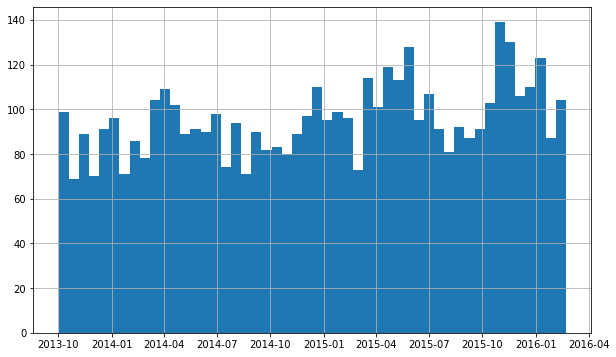

In [60]:
ow['DateTime'].hist(bins=50, figsize=(10,6))